## Mahmoud Emara

### $k$-NN Classification using 2-D features

#### 1. Carry out principal component analysis (PCA) of images in the training set and compute two-dimensional PCA features of training images

In [4]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)

# Labeled training set
training_images = images[:300]
training_labels = labels[:300]

# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

import numpy as np
import matplotlib.pyplot as plt

print("Dimensions of Images: ",training_images.shape[0],"x",training_images.shape[1])
print()

# Mean center data
imgdata = training_images
mean_vec = np.mean(training_images, axis=0)
img = imgdata - mean_vec

img = img.T
print("Dimensions of Images trasnposed and mean centered: ",img.shape[0],"x",img.shape[1])
print()

# Singular Value Decomposition
U, s, Vt = np.linalg.svd(img) # U -> left singular vectors
princ = U[:,0:2]

#Eiganvalue Decomposition
w, V = np.linalg.eigh(img@img.T) # V -> Eiganvectors of XX^T

# Top 2 principal components:
print("Top 2 Principal Components of the data matrix:")
#print(U[:,0:2])
print()

# PCA-based features of X: X_tilde = U^T X
X_tilde = np.matmul(princ.T, img)
print("The projected data using the top principal components: ")
#print(X_tilde.T)
print("X_tilde: ",X_tilde.T.shape)

Dimensions of Images:  300 x 64

Dimensions of Images trasnposed and mean centered:  64 x 300

Top 2 Principal Components of the data matrix:

The projected data using the top principal components: 
X_tilde:  (300, 2)


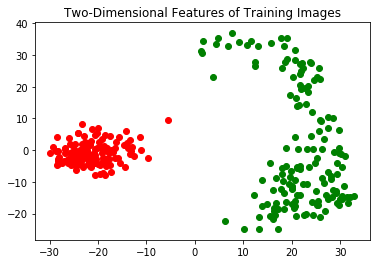

In [7]:
# Display the two-dimensional features of training images as points on 
# a two-dimensional scatter plot.
from matplotlib import pyplot as plt

zeroX = list()
zeroY = list()
oneX = list()
oneY = list()

for i in range(len(training_labels)):
    if(training_labels[i] == 0):
        zeroX.append(X_tilde.T[i][0])
        zeroY.append(X_tilde.T[i][1])
    if(training_labels[i] == 1):
        oneX.append(X_tilde.T[i][0])
        oneY.append(X_tilde.T[i][1])
 
fig = plt.figure()
plt.scatter(zeroX, zeroY, color='red')
plt.scatter(oneX, oneY, color='green')
plt.title('Two-Dimensional Features of Training Images')
plt.show()

#### 2. Classify each image in the test set by first transforming it to the two-dimensional PCA domain using the principal components obtained above and then using k-NN classification with k = 5 and the distance metric being $||^.||_2$

300
2
60
Prediction Labels:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]

Test Labels:  [0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


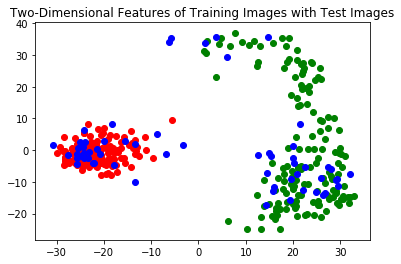

In [8]:
# Display the two-dimensional features of test images as points on a two-dimensional scatter plot.
# Color all points that are correctly classified as blue and all points that are incorrectly classified as
# black.
import math

# Mean centering the training images data set.
Timgdata = test_images
Tmean_vec = np.mean(test_images, axis=0)
Timg = Timgdata - Tmean_vec
Timg = Timg.T

# Projecting the Principal components onto the training images.
testX = np.matmul(princ.T, Timg)

#Define a distance function that calculates the Euclidean distance between two points using their xy coordinates.
def distanceCalc(var1x, var1y, var2x, var2y):
    a = (var2y - var1y)**2
    b = (var2x - var1x)**2
    distance = math.sqrt(a+b)
    return distance

k = 5
distList = list() # List to store distances, coordinates and labels of each comparison.
labelList = list() # Draft 1 of prediction labels that gathers all label comparisons.
labels = list() # The real prediction list.

print(len(X_tilde.T))
print(len(X_tilde.T[0]))
print(len(testX.T))
for x in range(len(testX.T)): 
    distList = list()
    for i in range(len(X_tilde.T)-1):
        for j in range(len(X_tilde.T[0])-1):
            d = distanceCalc(testX.T[x][j],testX.T[x][j+1],X_tilde.T[i][j],X_tilde.T[i][j+1])
            distList.append(d) # Store the distance
            distList.append(testX.T[x][j]) # Store the test image x coordinate
            distList.append(testX.T[x][j+1]) # Store the test image y coordinate
            distList.append(X_tilde.T[i][j]) # Store the training image x coordinate
            distList.append(X_tilde.T[i][j+1]) # Store the training image y coordinate
            distList.append(training_labels[i]) # Store the training image label.           
    dList = np.array(distList) # Transform distList into a matrix.
    vals = dList.reshape(299,6) # There should be 6 columns because there are 6 different type of information inputted.
    sortedList = sorted(vals, key=lambda y:y[0]) # Sort the whole matrix by distance.
    for a in range(k): # Look at the top k distances and store the label values of those points into a list.
        labelList.append(sortedList[a][5]) 

predictions = np.array(labelList) # Transform this list of labels into a matrix.
pred = predictions.reshape(60,5) # There should be 5 predicted labels for EACH test image.

# Check to see which label is more common for each test image and store those labels.
for i in range(len(pred)): 
    c0 = 0
    c1 = 0
    for j in range(len(pred[0])):
        if(pred[i][j] == 0):
            c0 += 1
        else:
            c1 += 1
    if (c0 > c1):
        labels.append(0)
    else:
        labels.append(1)

print("Prediction Labels: ",labels)
print()
print("Test Labels: ",test_labels)
correctX = list()
correctY = list()
incorrectX = list()
incorrectY = list()

# Creation of xy coordinates of test images based on prediction labels compared to actual labels.
for i in range(len(labels)):
    if(labels[i] == test_labels[i]):
        correctX.append(testX.T[i][0])
        correctY.append(testX.T[i][1])
    if(labels[i] != test_labels[i]):
        incorrectX.append(testX.T[i][0])
        incorrectY.append(testX.T[i][1])

fig = plt.figure()
plt.scatter(zeroX, zeroY, color='red')
plt.scatter(oneX, oneY, color='green')
plt.scatter(correctX, correctY, color='blue')
plt.scatter(incorrectX, incorrectY, color='black')
plt.title('Two-Dimensional Features of Training Images with Test Images')
plt.show()

#### 3. Compute and display the average classification error for the test set, $y_i$ denotes the true label of the $i$-th image, $\hat{y_i}$ denotes the label retured by $k$-NN and N = 60 in this particular problem

In [5]:
# Taking the average classification error.

summation = 0
for i in range((len(incorrectX))):
    summation = sum(incorrectX[i])
summation = summation / 60
print("Average classification error: ",summation)

Average classification error:  0.0


### $k$-NN Classification Using Higher-dimensional Features
#### 1. Carry out PCA of images in the training set and compute r-dimensional PCA features of training images such that the top-r principal components capture 95% of variation within the training data.

In [6]:
# Singular Value Decomposition
U, s, Vt = np.linalg.svd(img) # U -> left singular vectors

# Mean centering the data
imgH = training_images
mean_vector = np.mean(training_images, axis=0)
imgHigh = imgH - mean_vector

covVals = np.cov(imgHigh.T)
Uh, sh, Vth = np.linalg.svd(covVals)

# FInding the variation within the training data.
variance = [(i / sum(sh))*100 for i in sorted(sh, reverse=True)]
cumVariance = np.cumsum(variance)
for i in range(len(cumVariance)):
    print("Variance at k =",i,": ", cumVariance[i])
print()
print("We see that at k = 18, or the 19th column, the principal components captures 95.18% of the variation within the training data.")
print("Variance at k =",18,cumVariance[18])
print()

# PCA-based features of X: X_tilde = U^T X
r=19
rprinc = U[:,0:r]
X_H = np.matmul(rprinc.T, img)
print("X_tilde at higher dimensions: ",X_H.T.shape)

Variance at k = 0 :  42.97691940765875
Variance at k = 1 :  59.19323109131726
Variance at k = 2 :  69.24353667313451
Variance at k = 3 :  73.64204903838979
Variance at k = 4 :  77.2260967318592
Variance at k = 5 :  80.40899269444218
Variance at k = 6 :  83.2087210179832
Variance at k = 7 :  85.22267189541589
Variance at k = 8 :  86.91483128183174
Variance at k = 9 :  88.29831647698205
Variance at k = 10 :  89.52815346827452
Variance at k = 11 :  90.53776628262112
Variance at k = 12 :  91.50744872364385
Variance at k = 13 :  92.34395688851352
Variance at k = 14 :  93.06010463169967
Variance at k = 15 :  93.64785770290209
Variance at k = 16 :  94.20391720304102
Variance at k = 17 :  94.71941174336031
Variance at k = 18 :  95.18879479022205
Variance at k = 19 :  95.62108177222504
Variance at k = 20 :  96.02725604360006
Variance at k = 21 :  96.38309042999256
Variance at k = 22 :  96.69291617018276
Variance at k = 23 :  96.97686731217814
Variance at k = 24 :  97.25283410436015
Variance at 

#### 2. Classify each image in the test set by first transforming it to the r-dimensional PCA domain using the principal components obtained above and then using k-NN classification with the distance being $||^.||_2$ and $k$ being an odd integer from 1 to 9.

The average classification error at k= 1 :  0.4166666666666667


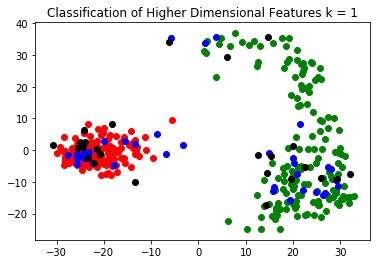

The average classification error at k= 3 :  0.4666666666666667


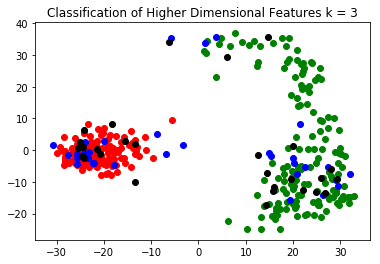

The average classification error at k= 5 :  0.45


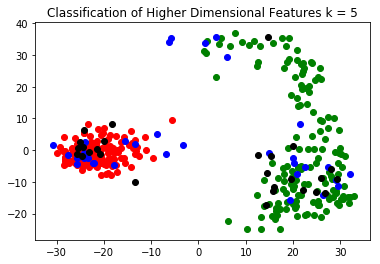

The average classification error at k= 7 :  0.45


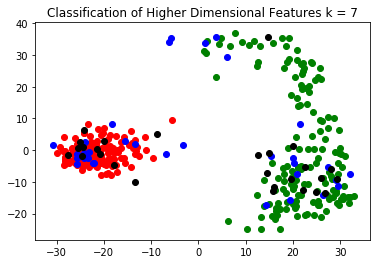

The average classification error at k= 9 :  0.45


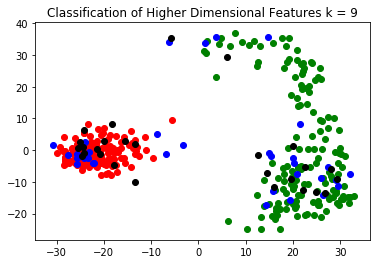

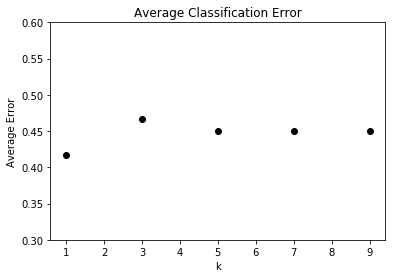

In [10]:
# Basically transformed the code from part 1 into a function using 'k' as a parameter to determine the computations.
avgError = list()
kList = [1,3,5,7,9]

def kNN(k):
    import math

    Timgdata = test_images
    Tmean_vec = np.mean(test_images, axis=0)
    Timg = Timgdata - Tmean_vec
    Timg = Timg.T

    testX = np.matmul(rprinc.T, Timg)

    def distanceCalc(var1x, var1y, var2x, var2y):
        a = (var2y - var1y)**2
        b = (var2x - var1x)**2
        distance = math.sqrt(a+b)
        return distance

    distList = list()
    labelList = list()
    labels = list()
    length = 0
    
    for x in range(len(testX.T)):
        distList = list()
        for i in range(len(X_H.T)-1):
            for j in range(len(X_H.T[0])-1):
                d = distanceCalc(testX.T[x][j],testX.T[x][j+1],X_H.T[i][j],X_H.T[i][j+1])
                distList.append(d)
                distList.append(testX.T[x][j])
                distList.append(testX.T[x][j+1])
                distList.append(X_H.T[i][j])
                distList.append(X_H.T[i][j+1])
                distList.append(training_labels[i])
                length += 1
        dList = np.array(distList)
        vals = dList.reshape(5382,6)
        sortedList = sorted(vals, key=lambda y:y[0])
        for a in range(k):
            labelList.append(sortedList[a][5])
    
    predictions = np.array(labelList)
    pred = predictions.reshape(60,k)

    for i in range(len(pred)):
        c0 = 0
        c1 = 0
        for j in range(len(pred[0])):
            if(pred[i][j] == 0):
                c0 += 1
            else:
                c1 += 1
        if (c0 > c1):
            labels.append(0)
        else:
            labels.append(1)

    correctX = list()
    correctY = list()
    incorrectX = list()
    incorrectY = list()

    for i in range(len(labels)):
        if(labels[i] == test_labels[i]):
            correctX.append(testX.T[i][0])
            correctY.append(testX.T[i][1])
        if(labels[i] != test_labels[i]):
            incorrectX.append(testX.T[i][0])
            incorrectY.append(testX.T[i][1])
    
    avgClassError = (len(incorrectX)) / 60
    print("The average classification error at k=",k,": ",avgClassError)
    avgError.append(avgClassError)
    
    fig = plt.figure()
    plt.scatter(zeroX, zeroY, color='red')
    plt.scatter(oneX, oneY, color='green')
    plt.scatter(correctX, correctY, color='blue')
    plt.scatter(incorrectX, incorrectY, color='black')
    plt.title('Classification of Higher Dimensional Features k = {}'.format(k))
    plt.show()
    
kNN(1) # Classification of image set at k = 1
kNN(3) # Classification of image set at k = 3
kNN(5) # Classification of image set at k = 5
kNN(7) # Classification of image set at k = 7
kNN(9) # Classification of image set at k = 9

fig = plt.figure()
plt.scatter(kList, avgError, color='black')
plt.title('Average Classification Error')
plt.xlabel('k')
plt.ylabel('Average Error')
plt.ylim(0.30,0.60)
plt.show()

Based on these plots, I would recommend k=1 because it yields the least amount of average classification error out of all k values. 